In [3]:
import seaborn as sns
df=sns.load_dataset("titanic")
print(df.shape)
print(df.head())
print(df.info())
print(df.describe())

(891, 15)
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     

In [4]:
df['age']=df['age'].fillna(df['age'].median())
print(df['age'])

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64


In [6]:
df['embarked']=df['embarked'].fillna(df['embarked'].mode()[0])
print(df['embarked'])

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: embarked, Length: 891, dtype: object


In [8]:
df['family_size'] = df['sibsp'] +  df['parch'] + 1
print(df['family_size'])

0      2
1      2
2      1
3      2
4      1
      ..
886    1
887    1
888    4
889    1
890    1
Name: family_size, Length: 891, dtype: int64


In [12]:
survival_by_gender=df.groupby('sex')['survived'].mean()

In [14]:
Sage_by_survival=df.groupby('survived')['age'].mean()

In [18]:
overall_survival=df['survived'].mean()
survival_by_class=df.groupby('pclass')['survived'].mean()
survival_by_gender=df.groupby('sex')['survived'].mean()
age_by_survival=df.groupby('survived')['age'].mean()
print("Overall survival rate:", overall_survival)
print("\nSurvival by class:\n",survival_by_class)
print("\nSurvival by gender:\n",survival_by_gender)
print("\nAverage age by sarvival\n",age_by_survival)

Overall survival rate: 0.3838383838383838

Survival by class:
 pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64

Survival by gender:
 sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

Average age by sarvival
 survived
0    30.028233
1    28.291433
Name: age, dtype: float64


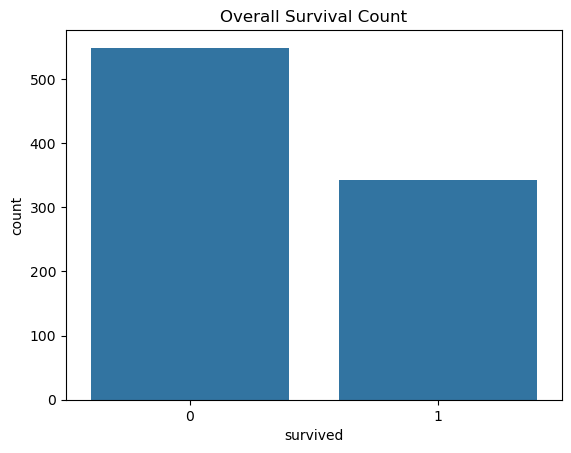

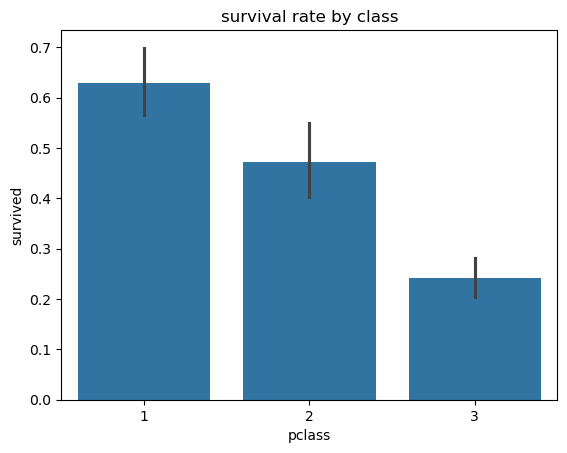

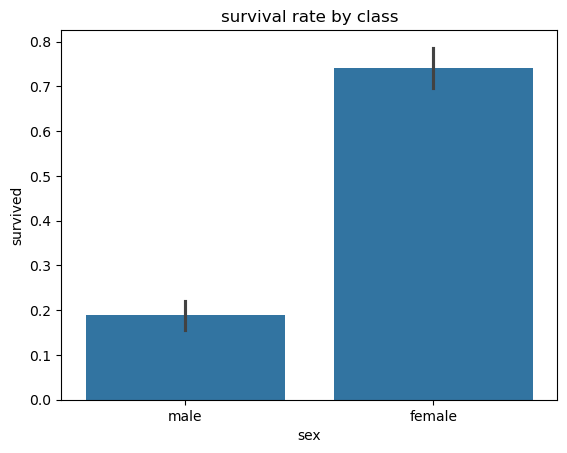

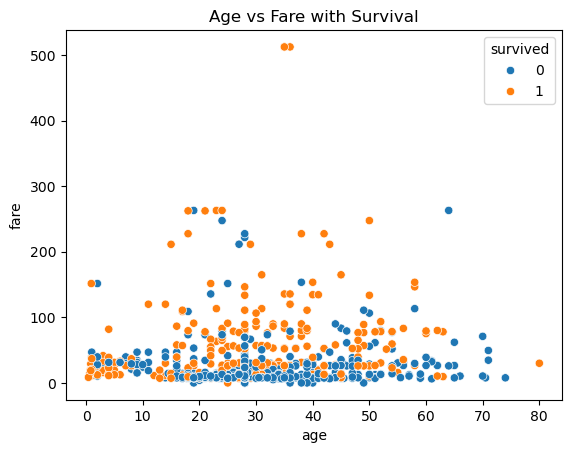

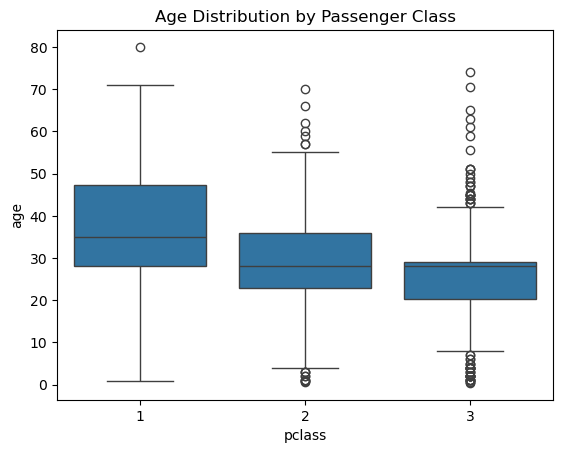

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt 
sns.countplot(x='survived', data=df)
plt.title("Overall Survival Count")
plt.show()
sns.barplot(x='pclass',y='survived', data=df)
plt.title("survival rate by class")
plt.show()
sns.barplot(x='sex',y='survived', data=df)
plt.title("survival rate by class")
plt.show()
sns.scatterplot(x='age', y='fare', hue='survived',data=df)
plt.title("Age vs Fare with Survival")
plt.show()
sns.boxplot(x='pclass', y='age', data=df)
plt.title("Age Distribution by Passenger Class")
plt.show()

1.Overall survival rate=38%
2.Women survived more(74%)compared to men (19%)
3.Class mattered:First class survival (63%)> Second (47%)>Third (24%)
4.Age mattered:Children had higher survival than older passengers.